# Test notebook for student's code for Assignment #4

## Required function definitions:

### Problem #1: 
- Function: exp_quad(f, tol)
- Input: a callable object (f) and a positive float (tol)
- Output: float

### Problem #2: 
- Function: parametric_interp(s, x, y)
- Input: two arrays of length N
- Output: callable object that takes an array of length M and returns an array of size (M, 2)


## How to run the test script:
Once you have defined the two functions, you run the function `HW4_Test` in last cell. The test script will output "Tests Passed" if the code passes all the tests otherwise it will output which tests have failed. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import gcd
from time import time

In [2]:
# Problem 1
def exp_quad(f, tol):           
    return np.inf

In [3]:
# Problem #2
def parametric_interp(s, x, y):
    return lambda s: np.zeros((s.size,2))

In [4]:
def print_convergence_table(M, err):
    header1 = "Convergence Table:\n"
    header2 = "      M     Error     Ratio"
    hbar = "-"*(len(header2)+2)
    first_row = " {:>6}   {:7.3e}"
    row = first_row + "  {:6.2f}"
    
    ratio = err[:-1]/err[1:]
    
    print(header1)
    print(header2)
    print(hbar)    
    print(first_row.format(M[0], err[0]))
    for kk, E, R in zip(M[1:], err[1:], ratio):
        print(row.format(kk, E, R))
    
    return

def plot_parametric_fit(x, xx, XX):
    M = x.shape[0]
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    plt.plot( x[:,0],  x[:, 1], 'o')
    plt.plot(xx[:,0], xx[:, 1], 'r')
    plt.plot(XX[:,0], XX[:, 1], 'g')
    
    ax.set_aspect('equal')
    ax.set_axis_off()
    
    plt.legend(['Nodes', 'Interpolant', 'Exact'])
    plt.title(f'{M} nodes')
    
    return
    
def print_integral_table(vI, vIe, vE, tol):
    header1 = "\nIntegral Table:\n"
    header2 = "Problem #    Approximation    Exact       Error"
    hline = "-"*(len(header2)+6)
    row     = "{:^9}      {:>9.3e}   {:10.3e}   {:9.3e} {}"

    print(header1)
    print(header2)
    print(hline)

    for kk, (I, I_exact, err) in enumerate(zip(vI, vIe, vE)):
        print(row.format(kk, I, I_exact, err, '*' if err > tol else ''))
            
    return

In [5]:
def test_problem_1(exp_quad, tol=1e-8):      
    
    benchmark_problems = [((lambda x: x          ), 1.0             ),
                          ((lambda x: x**2       ), 2.0             ),
                          ((lambda x: np.cos(x)  ), 1/2             ),
                          ((lambda x: -np.log(x) ), np.euler_gamma  ), 
                          ((lambda x: x*np.log(x)), 1-np.euler_gamma), 
                         ]
        
    start_time = time()
    
    vI  = np.zeros(len(benchmark_problems))
    vIe = np.zeros(len(benchmark_problems))
    vE  = np.zeros(len(benchmark_problems))
    
    failed = False
    for kk, (f, I_exact) in enumerate(benchmark_problems):
            
        I = exp_quad(f, tol)
        err = abs(I-I_exact)
        
        vI[kk] = I; vIe[kk] = I_exact; vE[kk] = err
                
        failed = failed or (err > tol)
    
    print_integral_table(vI, vIe, vE, tol)
    print('\nComputed solutions in {:3.2f} seconds.'.format(time() - start_time))
    print('\n{} the integral tests!\n'.format('Failed' if failed else 'Passed'))

    
    return not failed

def test_problem_2(parametric_interp, n_pts=5000, tol=1e-6, N=15):
    A = 1; B = 1
    a = 6; b = 5; delta = np.pi/4

    T = 2*np.pi*np.gcd(a, b)
    
    F = lambda s: np.c_[A*np.sin(a*s + delta), B*np.sin(b*s)]
    
    vM = 10*(2**np.arange(N))
    
    err = np.zeros((N,))
    passed = False
            
    for kk, M in enumerate(vM):
        s = np.linspace(0, T, M)
    
        x = F(s)
    
        f = parametric_interp(s, x[:,0], x[:,1])
        
        ss = np.linspace(0, T, n_pts)
        xx = f(ss)
        XX = F(ss)
        err[kk] = np.linalg.norm(xx-XX, np.inf)   
        
        if (kk == 0):
            plot_parametric_fit(x, xx, XX)
          
        
        if err[kk] < tol:
            vM = vM[:kk+1]
            err = err[:kk+1]
            passed = True
            break
            
    plot_parametric_fit(x, xx, XX)                    
    print_convergence_table(vM, err)        
        
    print('\n{} the parametric interepolation test!\n'.format('Passed' if passed else 'Failed'))
    
    return passed

def HW4_Test(exp_quad, parametric_interp):
    passed = test_problem_1(exp_quad) and test_problem_2(parametric_interp)
    
    print("\n\nTests {}!".format("passed" if passed else "failed"))
        
    return passed

## Test each function individually:

In [6]:
passed = test_problem_1(exp_quad)


Integral Table:

Problem #    Approximation    Exact       Error
-----------------------------------------------------
    0                inf    1.000e+00         inf *
    1                inf    2.000e+00         inf *
    2                inf    5.000e-01         inf *
    3                inf    5.772e-01         inf *
    4                inf    4.228e-01         inf *

Computed solutions in 0.00 seconds.

Failed the integral tests!



Convergence Table:

      M     Error     Ratio
-----------------------------
     10   1.995e+00
     20   1.995e+00    1.00
     40   1.995e+00    1.00
     80   1.995e+00    1.00
    160   1.995e+00    1.00
    320   1.995e+00    1.00
    640   1.995e+00    1.00
   1280   1.995e+00    1.00
   2560   1.995e+00    1.00
   5120   1.995e+00    1.00
  10240   1.995e+00    1.00
  20480   1.995e+00    1.00
  40960   1.995e+00    1.00
  81920   1.995e+00    1.00
 163840   1.995e+00    1.00

Failed the parametric interepolation test!



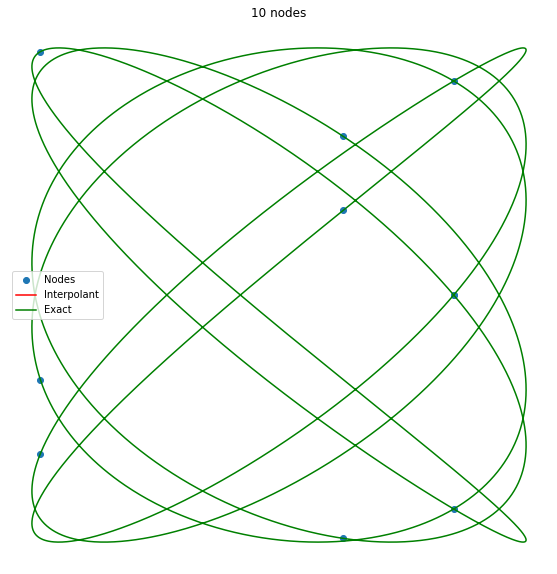

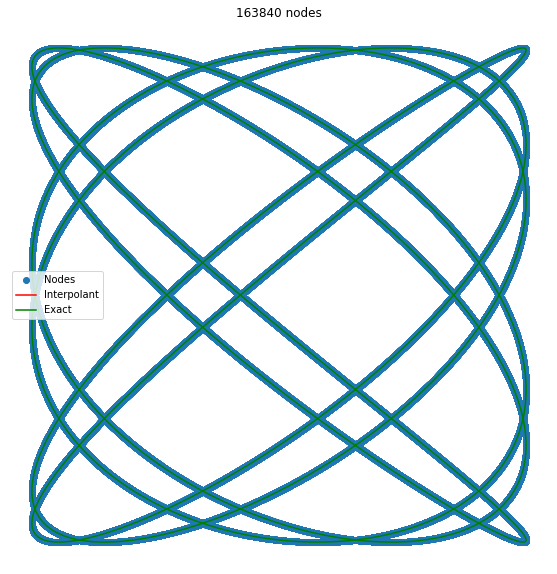

In [7]:
passed = test_problem_2(parametric_interp)

## Test all functions together

In [8]:
passed = HW4_Test(exp_quad, parametric_interp)


Integral Table:

Problem #    Approximation    Exact       Error
-----------------------------------------------------
    0                inf    1.000e+00         inf *
    1                inf    2.000e+00         inf *
    2                inf    5.000e-01         inf *
    3                inf    5.772e-01         inf *
    4                inf    4.228e-01         inf *

Computed solutions in 0.00 seconds.

Failed the integral tests!



Tests failed!
